In [1]:
pip install mplsoccer

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.8/85.8 kB 1.5 MB/s eta 0:00:00a 0:00:01

[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [2]:
#importing SBopen class from mplsoccer to open the data
from mplsoccer import Sbopen, Pitch, VerticalPitch

import matplotlib.pyplot as plt


/Users/jedrzejsarna/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [3]:
# The first thing we have to do is open the data. We use a parser SBopen available in mplsoccer.
parser = Sbopen()

#opening data using competition method
df_competition = parser.competition()
#structure of data
df_competition.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74 entries, 0 to 73
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             74 non-null     int64 
 1   season_id                  74 non-null     int64 
 2   country_name               74 non-null     object
 3   competition_name           74 non-null     object
 4   competition_gender         74 non-null     object
 5   competition_youth          74 non-null     bool  
 6   competition_international  74 non-null     bool  
 7   season_name                74 non-null     object
 8   match_updated              74 non-null     object
 9   match_updated_360          56 non-null     object
 10  match_available_360        10 non-null     object
 11  match_available            74 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 6.1+ KB


In [4]:
df_competition['competition_name'].unique()

array(['1. Bundesliga', 'African Cup of Nations', 'Champions League',
       'Copa America', 'Copa del Rey', "FA Women's Super League",
       'FIFA U20 World Cup', 'FIFA World Cup', 'Indian Super league',
       'La Liga', 'Liga Profesional', 'Ligue 1', 'Major League Soccer',
       'North American League', 'NWSL', 'Premier League', 'Serie A',
       'UEFA Euro', 'UEFA Europa League', "UEFA Women's Euro",
       "Women's World Cup"], dtype=object)

In [5]:
df_competition[(df_competition['competition_name'] == 'UEFA Euro') & (df_competition['season_name'] == '2024')]

,competition_id,season_id,country_name,competition_name,competition_gender,competition_youth,competition_international,season_name,match_updated,match_updated_360,match_available_360,match_available
68,55,282,Europe,UEFA Euro,male,False,True,2024,2024-07-15T15:48:50.315500,2024-07-15T15:52:24.778809,2024-07-15T15:52:24.778809,2024-07-15T15:48:50.315500


In [82]:
#opening data using match method
df_euros = parser.match(competition_id=55, season_id=282)
#structure of data
df_euros.columns

Index(['match_id', 'match_date', 'kick_off', 'home_score', 'away_score',
       'match_status', 'match_status_360', 'last_updated', 'last_updated_360',
       'match_week', 'competition_id', 'country_name', 'competition_name',
       'season_id', 'season_name', 'home_team_id', 'home_team_name',
       'home_team_gender', 'home_team_group', 'home_team_country_id',
       'home_team_country_name', 'home_team_managers_id',
       'home_team_managers_name', 'home_team_managers_nickname',
       'home_team_managers_dob', 'home_team_managers_country_id',
       'home_team_managers_country_name', 'away_team_id', 'away_team_name',
       'away_team_gender', 'away_team_group', 'away_team_country_id',
       'away_team_country_name', 'away_team_managers_id',
       'away_team_managers_name', 'away_team_managers_nickname',
       'away_team_managers_dob', 'away_team_managers_country_id',
       'away_team_managers_country_name', 'metadata_data_version',
       'metadata_shot_fidelity_version', 'm

In [25]:
df_euros[(df_euros['home_team_country_name'] == 'Netherlands') | (df_euros['away_team_country_name'] == 'Netherlands')]

,match_id,match_date,kick_off,home_score,away_score,match_status,match_status_360,last_updated,last_updated_360,match_week,...,competition_stage_id,competition_stage_name,stadium_id,stadium_name,stadium_country_id,stadium_country_name,referee_id,referee_name,referee_country_id,referee_country_name
0,3942819,2024-07-10,2024-07-10 22:00:00,1,2,available,available,2024-07-15 07:54:23.583297,2024-07-15 07:57:36.684453,6,...,15,Semi-finals,373,Signal-Iduna-Park,85,Germany,241,Felix Zwayer,85,Germany
3,3942382,2024-07-06,2024-07-06 22:00:00,2,1,available,available,2024-07-10 06:50:04.068615,2024-07-10 06:56:35.146850,5,...,11,Quarter-finals,367,Olympiastadion Berlin,85,Germany,76,Clément Turpin,78,France
5,3930180,2024-06-25,2024-06-25 19:00:00,2,3,available,available,2024-07-11 13:24:55.422159,2024-07-11 13:25:37.289456,3,...,10,Group Stage,367,Olympiastadion Berlin,85,Germany,941,Ivan Kružliak,207,Slovakia
12,3941021,2024-07-02,2024-07-02 19:00:00,0,3,available,available,2024-07-12 23:26:38.304669,2024-07-12 23:28:27.122555,4,...,33,Round of 16,4867,Allianz Arena,85,Germany,241,Felix Zwayer,85,Germany
22,3930173,2024-06-21,2024-06-21 22:00:00,0,0,available,available,2024-07-12 19:37:47.584481,2024-07-12 19:39:43.381031,2,...,10,Group Stage,5249,Trainingszentrum RB Leipzig Platz 1,85,Germany,8,Anthony Taylor,68,England
29,3938637,2024-06-16,2024-06-16 16:00:00,1,2,available,available,2024-07-12 03:37:17.747730,2024-07-12 03:39:53.010211,1,...,10,Group Stage,379,Volksparkstadion,85,Germany,2445,Artur Manuel Ribeiro Soares Dias,183,Portugal


# Now get the corresponding match_id to use for .event() method

In [76]:
#opening data
df_event, df_related, df_freeze, df_tactics = parser.event(3938637)
#if you want only event data you can use
#df_event = parser.event(69301)[0]
#structure of data
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3401 non-null   object 
 1   index                           3401 non-null   int64  
 2   period                          3401 non-null   int64  
 3   timestamp                       3401 non-null   object 
 4   minute                          3401 non-null   int64  
 5   second                          3401 non-null   int64  
 6   possession                      3401 non-null   int64  
 7   duration                        2482 non-null   float64
 8   match_id                        3401 non-null   int64  
 9   type_id                         3401 non-null   int64  
 10  type_name                       3401 non-null   object 
 11  possession_team_id              3401 non-null   int64  
 12  possession_team_name            34

In [77]:
df_event

,id,index,period,timestamp,minute,second,possession,duration,match_id,type_id,...,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,ball_recovery_recovery_failure,pass_deflected,pass_cut_back,substitution_replacement_id,substitution_replacement_name,pass_no_touch,foul_won_defensive
0,fca2cd4d-7cda-4d85-87cc-c15e2042827e,1,1,00:00:00,0,0,1,0.000000,3938637,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,afbd7e9f-a67a-4d4c-9800-26403b6b71d2,2,1,00:00:00,0,0,1,0.000000,3938637,35,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ff18fc34-673e-4677-81ab-346a8148624d,3,1,00:00:00,0,0,1,0.000000,3938637,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,006e8d10-d2d7-49b2-bef1-d9573cb3823b,4,1,00:00:00,0,0,1,0.000000,3938637,18,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,57b3cd29-6810-47e7-a7c2-2baf15c4fd6b,5,1,00:00:01.289000,0,1,2,1.154519,3938637,30,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3396,54c27dcb-5835-47a0-baf2-bcd0d59f93e1,3397,2,00:49:45.566000,94,45,150,1.710238,3938637,43,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3397,7f3a8532-8312-41f5-9380-2b3bad74ace5,3398,2,00:49:47.276000,94,47,150,0.984767,3938637,16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3398,7a272c1e-6482-4a30-a2a6-7760f7a9c92b,3399,2,00:49:48.261000,94,48,150,0.000000,3938637,23,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3399,6d51fea9-4ec2-462c-be96-43c91aeb0be2,3400,2,00:50:02.268000,95,2,150,0.000000,3938637,34,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
gakpo_events = df_event[(df_event['player_name'] == 'Cody Mathès Gakpo') ][['period','timestamp', 'type_name', 'possession', 'play_pattern_name', 'position_name', 'duration']]

In [37]:
gakpo_events.style.set_sticky().set_table_attributes('style="overflow:scroll;height:300px;"')


,period,timestamp,type_name,possession,play_pattern_name,position_name,duration
26,1,00:00:37.861000,Ball Receipt,3,Regular Play,Left Wing,nan
27,1,00:00:37.861000,Duel,3,Regular Play,Left Wing,0.000000
77,1,00:01:41.692000,Ball Receipt,5,From Throw In,Left Wing,nan
78,1,00:01:41.692000,Carry,5,From Throw In,Left Wing,3.684446
79,1,00:01:45.376000,Shot,5,From Throw In,Left Wing,0.069986
94,1,00:02:33.889000,Pressure,6,From Corner,Left Wing,0.203818
95,1,00:02:34.072000,Ball Receipt,6,From Corner,Left Wing,nan
107,1,00:03:04.503000,Ball Receipt,6,From Corner,Left Wing,nan
108,1,00:03:04.503000,Carry,6,From Corner,Left Wing,3.678645
110,1,00:03:08.182000,Pass,6,From Corner,Left Wing,1.100165


In [35]:
gakpo_events.groupby('type_name').size()

type_name
Ball Receipt     45
Ball Recovery     3
Block             1
Carry            40
Clearance         1
Dispossessed      1
Dribble           4
Dribbled Past     1
Duel              3
Foul Won          4
Miscontrol        1
Pass             34
Pressure         11
Shot              5
Substitution      1
dtype: int64

srednio czesciej majac pilke (czyli podczas 'possesion') cody gakpo oddawal strzal od innych lewoskrzydlowych na turnieju)

Wyplotuj cos!!

In [49]:
df_event_smaller = df_event[['period', 'timestamp',  'possession',  'player_name', 'type_name', 'outcome_name', 'team_name']]


In [50]:
df_event_smaller.head(50)

,period,timestamp,possession,player_name,type_name,outcome_name,team_name
0,1,00:00:00,1,NaN,Starting XI,NaN,Poland
1,1,00:00:00,1,NaN,Starting XI,NaN,Netherlands
2,1,00:00:00,1,NaN,Half Start,NaN,Netherlands
3,1,00:00:00,1,NaN,Half Start,NaN,Poland
4,1,00:00:01.289000,2,Piotr Zieliński,Pass,NaN,Poland
5,1,00:00:02.444000,2,Sebastian Szymański,Ball Receipt,NaN,Poland
6,1,00:00:02.444000,2,Sebastian Szymański,Pass,NaN,Poland
7,1,00:00:04.502000,2,Nicola Zalewski,Ball Receipt,NaN,Poland
8,1,00:00:04.502000,2,Nicola Zalewski,Carry,NaN,Poland
9,1,00:00:07.020000,2,Denzel Dumfries,Pressure,NaN,Netherlands


In [45]:
df_event.groupby('type_name').size().sort_values(ascending=False)

type_name
Pass               954
Ball Receipt       919
Carry              810
Pressure           263
Ball Recovery       73
Duel                54
Block               45
Clearance           44
Goal Keeper         38
Shot                33
Dribble             28
Dribbled Past       21
Dispossessed        21
Foul Committed      18
Foul Won            18
Interception        16
Miscontrol          12
Substitution        10
Tactical Shift       5
Half Start           4
Half End             4
Injury Stoppage      2
Player Off           2
Player On            2
Starting XI          2
50/50                2
Error                1
dtype: int64

In [47]:
578+283 #Pass nie musza byc celne?

861

In [48]:
df_event.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3401 entries, 0 to 3400
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3401 non-null   object 
 1   index                           3401 non-null   int64  
 2   period                          3401 non-null   int64  
 3   timestamp                       3401 non-null   object 
 4   minute                          3401 non-null   int64  
 5   second                          3401 non-null   int64  
 6   possession                      3401 non-null   int64  
 7   duration                        2482 non-null   float64
 8   match_id                        3401 non-null   int64  
 9   type_id                         3401 non-null   int64  
 10  type_name                       3401 non-null   object 
 11  possession_team_id              3401 non-null   int64  
 12  possession_team_name            34

In [51]:
shots = df_event.loc[df_event['type_name'] == 'Shot'].set_index('id')

In [53]:
shots

,index,period,timestamp,minute,second,possession,duration,match_id,type_id,type_name,...,foul_committed_card_id,foul_committed_card_name,pass_goal_assist,ball_recovery_recovery_failure,pass_deflected,pass_cut_back,substitution_replacement_id,substitution_replacement_name,pass_no_touch,foul_won_defensive
id,,,,,,,,,,,,,,,,,,,,,
68b870f8-f2d5-40ad-9896-7f2c40c2f15c,80,1,00:01:45.376000,1,45,5,0.069986,3938637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5bb37098-b79d-493b-882f-f6ad6e68670b,191,1,00:05:02.814000,5,2,11,0.562095,3938637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8b0e3afc-b68d-46a3-bd2d-033a70495e6a,310,1,00:07:22.493000,7,22,14,2.642188,3938637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7f0b3c7c-6a25-4e08-8d6c-513ccd9f584d,351,1,00:08:54.853000,8,54,16,0.718088,3938637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
74b0df01-826c-4073-9b04-7dea9151d1e1,379,1,00:09:49.109000,9,49,17,0.084777,3938637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
757c6d60-db69-44dc-b1e3-a9a81e2fac72,535,1,00:13:34.771000,13,34,22,1.437100,3938637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3c80a40d-70ad-47a7-84ac-4604515d01d9,579,1,00:15:50.430000,15,50,25,0.691385,3938637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
739f03d7-b8b0-4199-8346-31986db53fcc,689,1,00:19:28.048000,19,28,28,0.555218,3938637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
705f5ae7-5d72-4676-96b7-6f88809c5577,789,1,00:21:16.016000,21,16,33,0.561947,3938637,16,Shot,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
team1, team2 = df_event.team_name.unique()
print(team1, team2)

Poland Netherlands


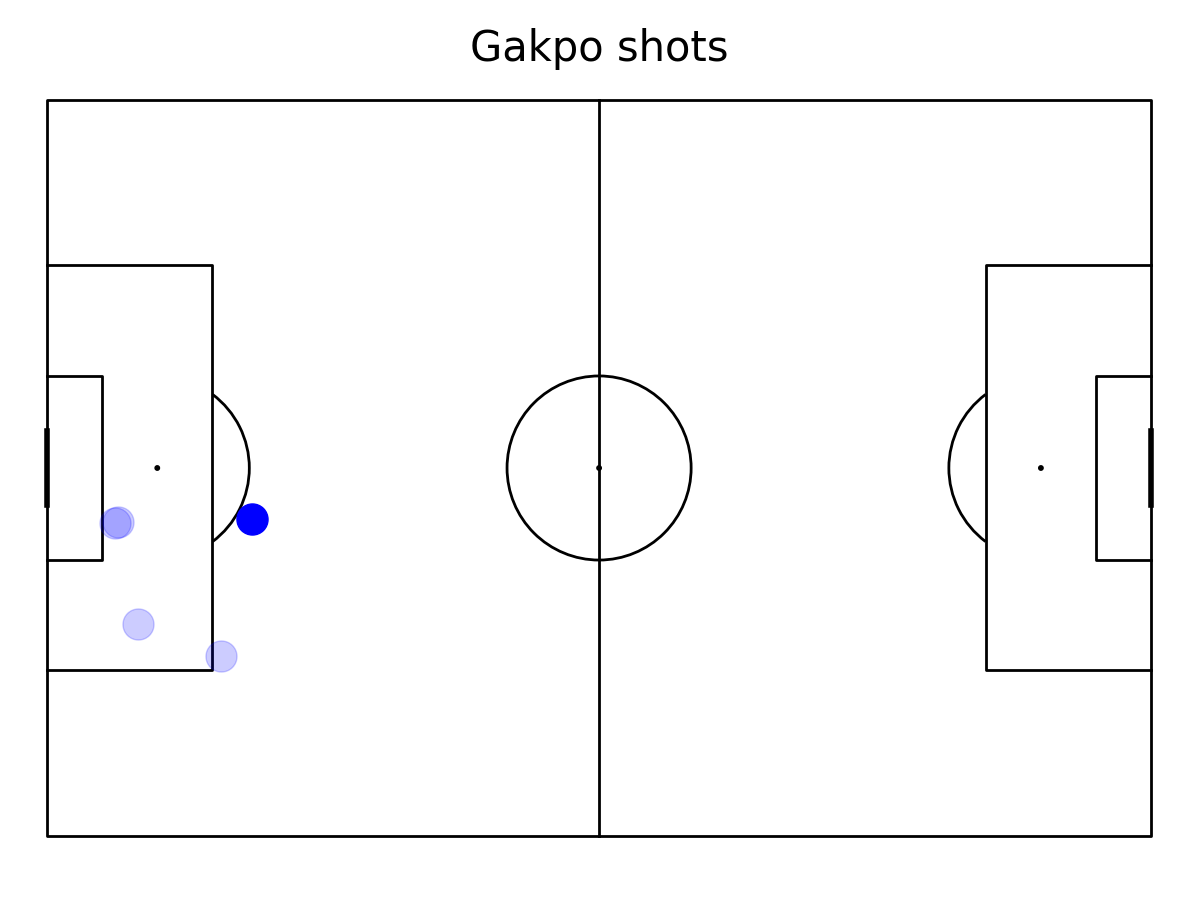

In [64]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

mask_netherlands = (df_event.type_name == 'Shot') & (df_event.team_name == team2) & (df_event.player_name.str.contains('Gakpo'))
df_netherlands = df_event.loc[mask_netherlands, ['x', 'y', 'outcome_name', "player_name"]]

#for Sweden we need to revert coordinates
for i, row in df_netherlands.iterrows():
    if row["outcome_name"] == 'Goal':
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 1, s = 500, color = "blue", ax=ax['pitch'])
    else:
       pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 500, color = "blue", ax=ax['pitch'])

fig.suptitle("Gakpo shots", fontsize = 30)
plt.show()

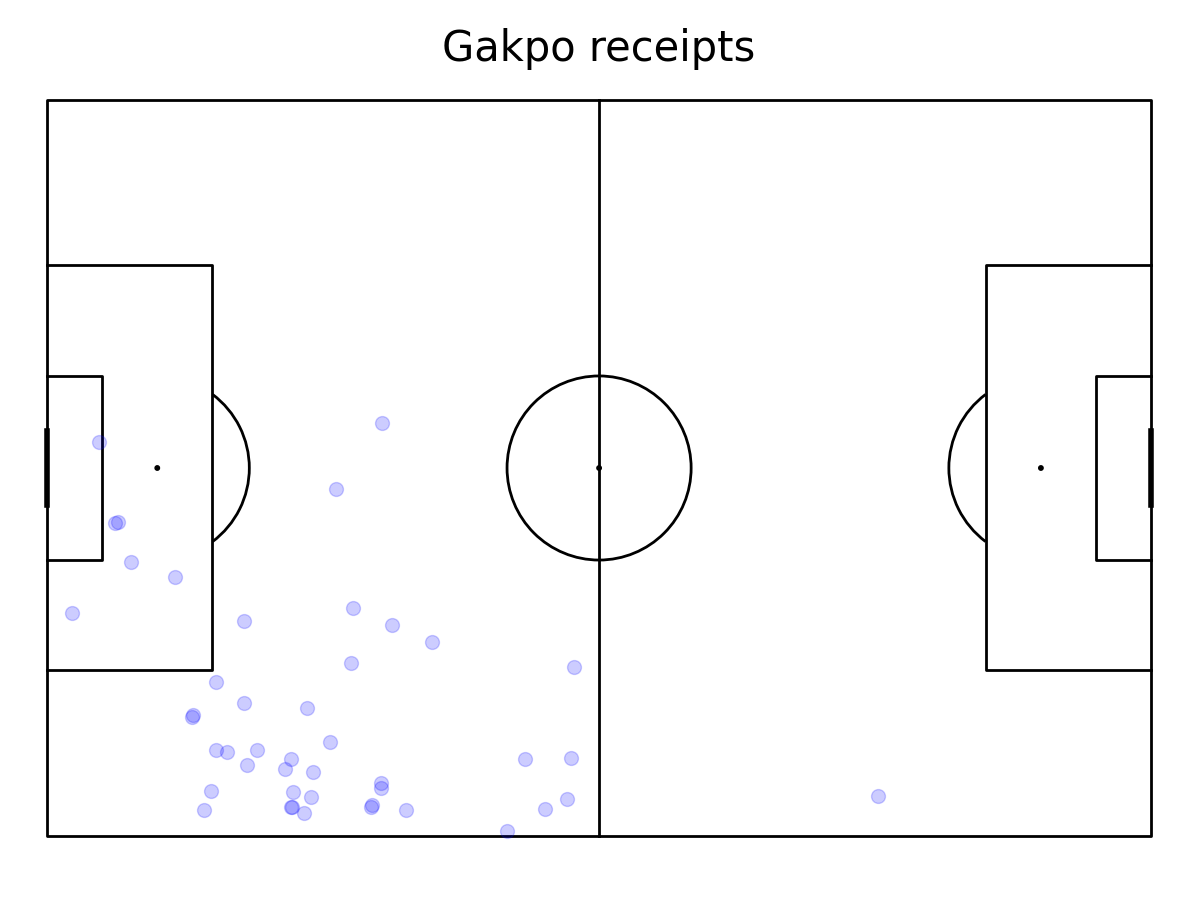

In [75]:
#create pitch
pitch = Pitch(line_color='black')
fig, ax = pitch.grid(grid_height=0.9, title_height=0.06, axis=False,
                     endnote_height=0.04, title_space=0, endnote_space=0)

mask_netherlands = (df_event.type_name == 'Ball Receipt') & (df_event.player_name.str.contains('Gakpo'))
df_netherlands = df_event.loc[mask_netherlands, ['x', 'y']]
for i, row in df_netherlands.iterrows():
    pitch.scatter(120 - row.x, 80 - row.y, alpha = 0.2, s = 100, color = "blue", ax=ax['pitch'])
fig.suptitle("Gakpo receipts", fontsize = 30)
plt.show()